In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

stat = pd.read_csv("stat.csv")
stat.columns = ['br','coverage','ssim','psnr']
stat_arr = np.array(stat)
group_size = 0
while(stat_arr[group_size][0]==0):
    group_size += 1
print(group_size)
total_len = len(stat_arr)

coverages = stat_arr[0:group_size,1].tolist()
# print(coverages)

#reorganize the array
iteration = int(total_len/group_size)
print(iteration)
index = []
for i in range(group_size):
    for j in range(iteration):
        index.append(group_size*j+i)
print(index)
stat_new = stat_arr[index]
print(stat_new)


3
5
[0, 3, 6, 9, 12, 1, 4, 7, 10, 13, 2, 5, 8, 11, 14]
[[ 0.0000000e+00 -2.0000000e+00  9.8538300e-01  4.3740330e+01]
 [ 1.0000000e-02 -2.0000000e+00  8.9702200e-01  2.8553860e+01]
 [ 1.0000000e-01 -2.0000000e+00  9.5384300e-01  3.0122666e+01]
 [ 1.0000000e+00 -2.0000000e+00  8.2452600e-01  2.3757667e+01]
 [ 5.0000000e+00 -2.0000000e+00  7.6048100e-01  2.0612285e+01]
 [ 0.0000000e+00  0.0000000e+00  9.8538300e-01  4.3740330e+01]
 [ 1.0000000e-02  0.0000000e+00  8.9702200e-01  2.8553860e+01]
 [ 1.0000000e-01  0.0000000e+00  9.5385000e-01  3.0122596e+01]
 [ 1.0000000e+00  0.0000000e+00  8.2457200e-01  2.3777403e+01]
 [ 5.0000000e+00  0.0000000e+00  7.6019900e-01  2.0599736e+01]
 [ 0.0000000e+00 -1.0000000e+00  9.8538300e-01  4.3740330e+01]
 [ 1.0000000e-02 -1.0000000e+00  9.8538300e-01  4.3740330e+01]
 [ 1.0000000e-01 -1.0000000e+00  9.4456700e-01  2.6306366e+01]
 [ 1.0000000e+00 -1.0000000e+00  8.5569900e-01  2.2425455e+01]
 [ 5.0000000e+00 -1.0000000e+00  7.6545700e-01  1.8641058e+01]]

[0.   0.01 0.1  1.   5.  ]
[43.74033  28.55386  30.122666 23.757667 20.612285]
[43.74033  28.55386  30.122596 23.777403 20.599736]
[43.74033  43.74033  26.306366 22.425455 18.641058]


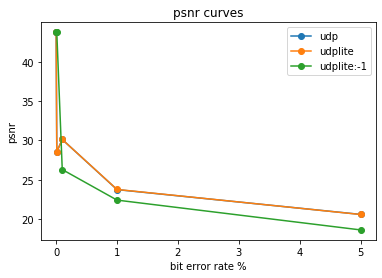

In [26]:

x_bit_error = stat_new[0:iteration, 0]
print(x_bit_error)
for i in range(group_size):
    y_psnr = stat_new[i*iteration:i*iteration+iteration, 3]
    print(y_psnr)
    if(coverages[i] == 0):
        label_title = "udplite"
    elif(coverages[i] == -2):
        label_title = "udp"
    else:
        label_title = "udplite:" + str(int(coverages[i]))
    plt.plot(x_bit_error, y_psnr, label = label_title, linestyle='-', marker='o')


plt.xlabel('bit error rate %')
# Set the y axis label of the current axis.
plt.ylabel('psnr')
# Set a title of the current axes.
plt.title('psnr curves')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.savefig("psnr.png",format="png")
plt.show()



[0.   0.01 0.1  1.   5.  ]


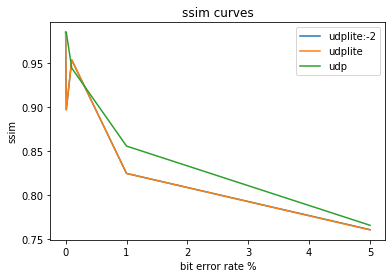

In [13]:

x_bit_error = stat_new[0:iteration, 0]
print(x_bit_error)
for i in range(group_size):
    y_ssim = stat_new[i*iteration:i*iteration+iteration, 2]
    if(coverages[i] == 0):
        label_title = "udplite"
    elif(coverages[i] == -1):
        label_title = "udp"
    else:
        label_title = "udplite:" + str(int(coverages[i]))
    plt.plot(x_bit_error, y_ssim, label = label_title)


plt.xlabel('bit error rate %')
# Set the y axis label of the current axis.
plt.ylabel('ssim')
# Set a title of the current axes.
plt.title('ssim curves')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.savefig("ssim.png",format="png")
plt.show()

